In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

## Step 2: Generate Dataset

#### Creates 300 points in the shape of two half moons. Adds a bit noise to make it realistic.

In [4]:
X,Y = make_moons(n_samples = 300, noise = 0.05, random_state = 0)

## Step 3: Visualize the Data

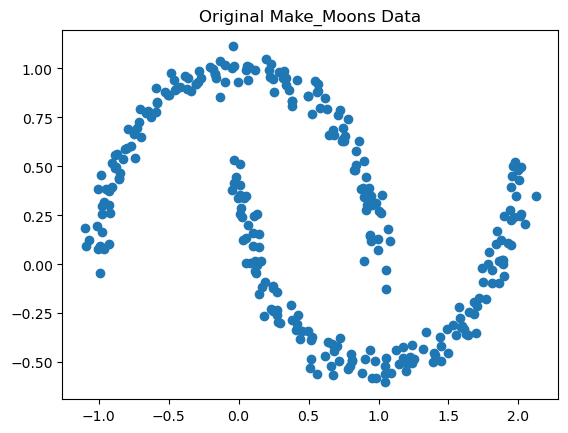

In [7]:
plt.scatter(X[:,0], X[:,1]) # X[:,0] means take all rows from clumn 0 of X
plt.title('Original Make_Moons Data')
plt.show()

## Step 4 : Standardize the Data

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 5: Plot K-Distance Graph

In [13]:
neighbors = NearestNeighbors(n_neighbors = 5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

Text(0.5, 1.0, 'K-Distance Graph (k = 5)')

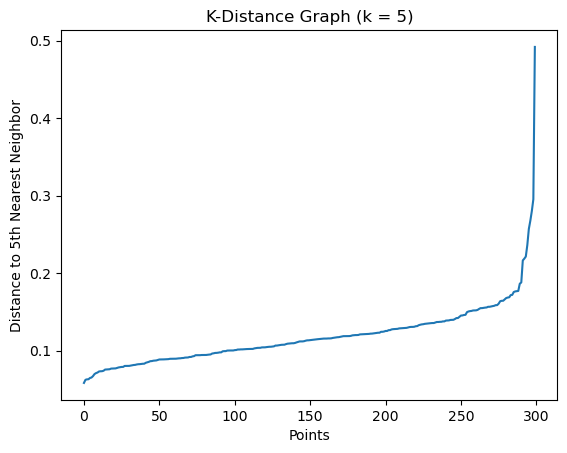

In [15]:
distances = np.sort(distances[:,4], axis = 0)
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance to 5th Nearest Neighbor')
plt.title('K-Distance Graph (k = 5)')

## Step 6: Apply DBSCAN

In [48]:
dbscan = DBSCAN(eps = 0.28, min_samples = 5)
clusters = dbscan.fit_predict(X_scaled)
labels = dbscan.labels_

## Step 7: Visualize the Clusters

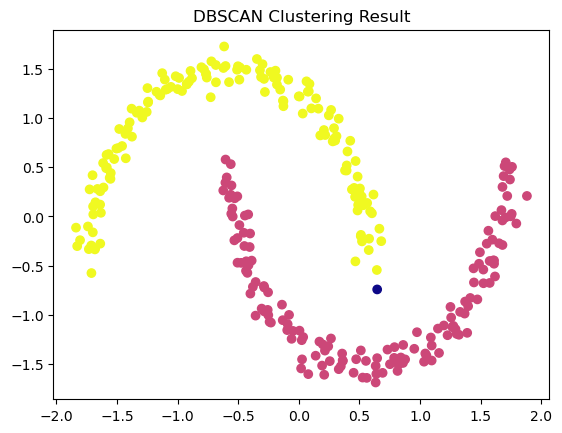

In [42]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c = labels, cmap = 'plasma')
plt.title('DBSCAN Clustering Result')
plt.show()

In [50]:
mask = labels!= -1 # Points labeled -1 are noise, we dont include outliers in silhouette score because it may give error or provide misleading result
X_filtered = X_scaled[mask]
labels_filtered = labels[mask]

In [52]:
score = silhouette_score(X_filtered, labels_filtered)
print('Silhouette_Score:', score)

Silhouette_Score: 0.38751729792467005


In [66]:
for eps_val in [ 0.25, 0.30]:
    db = DBSCAN(eps = eps_val, min_samples=5).fit(X_scaled)
    score = silhouette_score(X_scaled, db.labels_)
    print(f"eps : {eps_val}, Silhouette Score : {score}")

eps : 0.25, Silhouette Score : 0.023070991915249372
eps : 0.3, Silhouette Score : 0.3826421764045932


In [60]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print("Cluster Fount:", n_clusters)
print('Noise Points', n_noise)

Cluster Fount: 2
Noise Points 1
